# Séance 9 -- correction -- Données HadCRUT5

In [2]:
import seaborn
import pandas
from sklearn import manifold
import seaborn.objects as so
from sklearn.preprocessing import scale

## Données HadCRUT5


In [3]:
temp = pandas.read_table(
    "https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT5.0Analysis_gl.txt", 
    sep = "\s+", 
    names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Annual"])
temp = temp.iloc[::2]
temp = temp.iloc[:-1] # suppression de la dernière ligne (i.e. 2024 n'est pas finie)
temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1850,-0.675,-0.333,-0.591,-0.589,-0.509,-0.344,-0.160,-0.208,-0.385,-0.533,-0.283,-0.404,-0.418
1851,-0.201,-0.469,-0.646,-0.542,-0.198,-0.137,-0.097,-0.102,-0.091,-0.008,-0.082,-0.228,-0.233
1852,-0.375,-0.477,-0.560,-0.585,-0.127,-0.084,0.005,-0.136,-0.002,-0.172,-0.305,0.065,-0.229
1853,-0.233,-0.404,-0.280,-0.386,-0.268,-0.142,-0.083,-0.057,-0.250,-0.392,-0.411,-0.337,-0.270
1854,-0.381,-0.361,-0.243,-0.334,-0.289,-0.299,-0.179,-0.239,-0.217,-0.095,-0.410,-0.450,-0.292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0.800,0.844,1.076,0.939,0.778,0.809,0.857,0.858,0.803,0.956,0.937,1.037,0.891
2020,1.069,1.113,1.094,1.063,0.908,0.825,0.816,0.801,0.867,0.811,1.014,0.693,0.923
2021,0.701,0.565,0.726,0.760,0.706,0.713,0.792,0.799,0.868,0.907,0.854,0.751,0.762
2022,0.779,0.764,0.890,0.770,0.761,0.858,0.778,0.853,0.790,0.929,0.675,0.768,0.801


In [6]:
temp_bis = temp.drop(["Annual"], axis = 1)
temp_bis

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1850,-0.675,-0.333,-0.591,-0.589,-0.509,-0.344,-0.160,-0.208,-0.385,-0.533,-0.283,-0.404
1851,-0.201,-0.469,-0.646,-0.542,-0.198,-0.137,-0.097,-0.102,-0.091,-0.008,-0.082,-0.228
1852,-0.375,-0.477,-0.560,-0.585,-0.127,-0.084,0.005,-0.136,-0.002,-0.172,-0.305,0.065
1853,-0.233,-0.404,-0.280,-0.386,-0.268,-0.142,-0.083,-0.057,-0.250,-0.392,-0.411,-0.337
1854,-0.381,-0.361,-0.243,-0.334,-0.289,-0.299,-0.179,-0.239,-0.217,-0.095,-0.410,-0.450
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0.800,0.844,1.076,0.939,0.778,0.809,0.857,0.858,0.803,0.956,0.937,1.037
2020,1.069,1.113,1.094,1.063,0.908,0.825,0.816,0.801,0.867,0.811,1.014,0.693
2021,0.701,0.565,0.726,0.760,0.706,0.713,0.792,0.799,0.868,0.907,0.854,0.751
2022,0.779,0.764,0.890,0.770,0.761,0.858,0.778,0.853,0.790,0.929,0.675,0.768


### ISOMAP

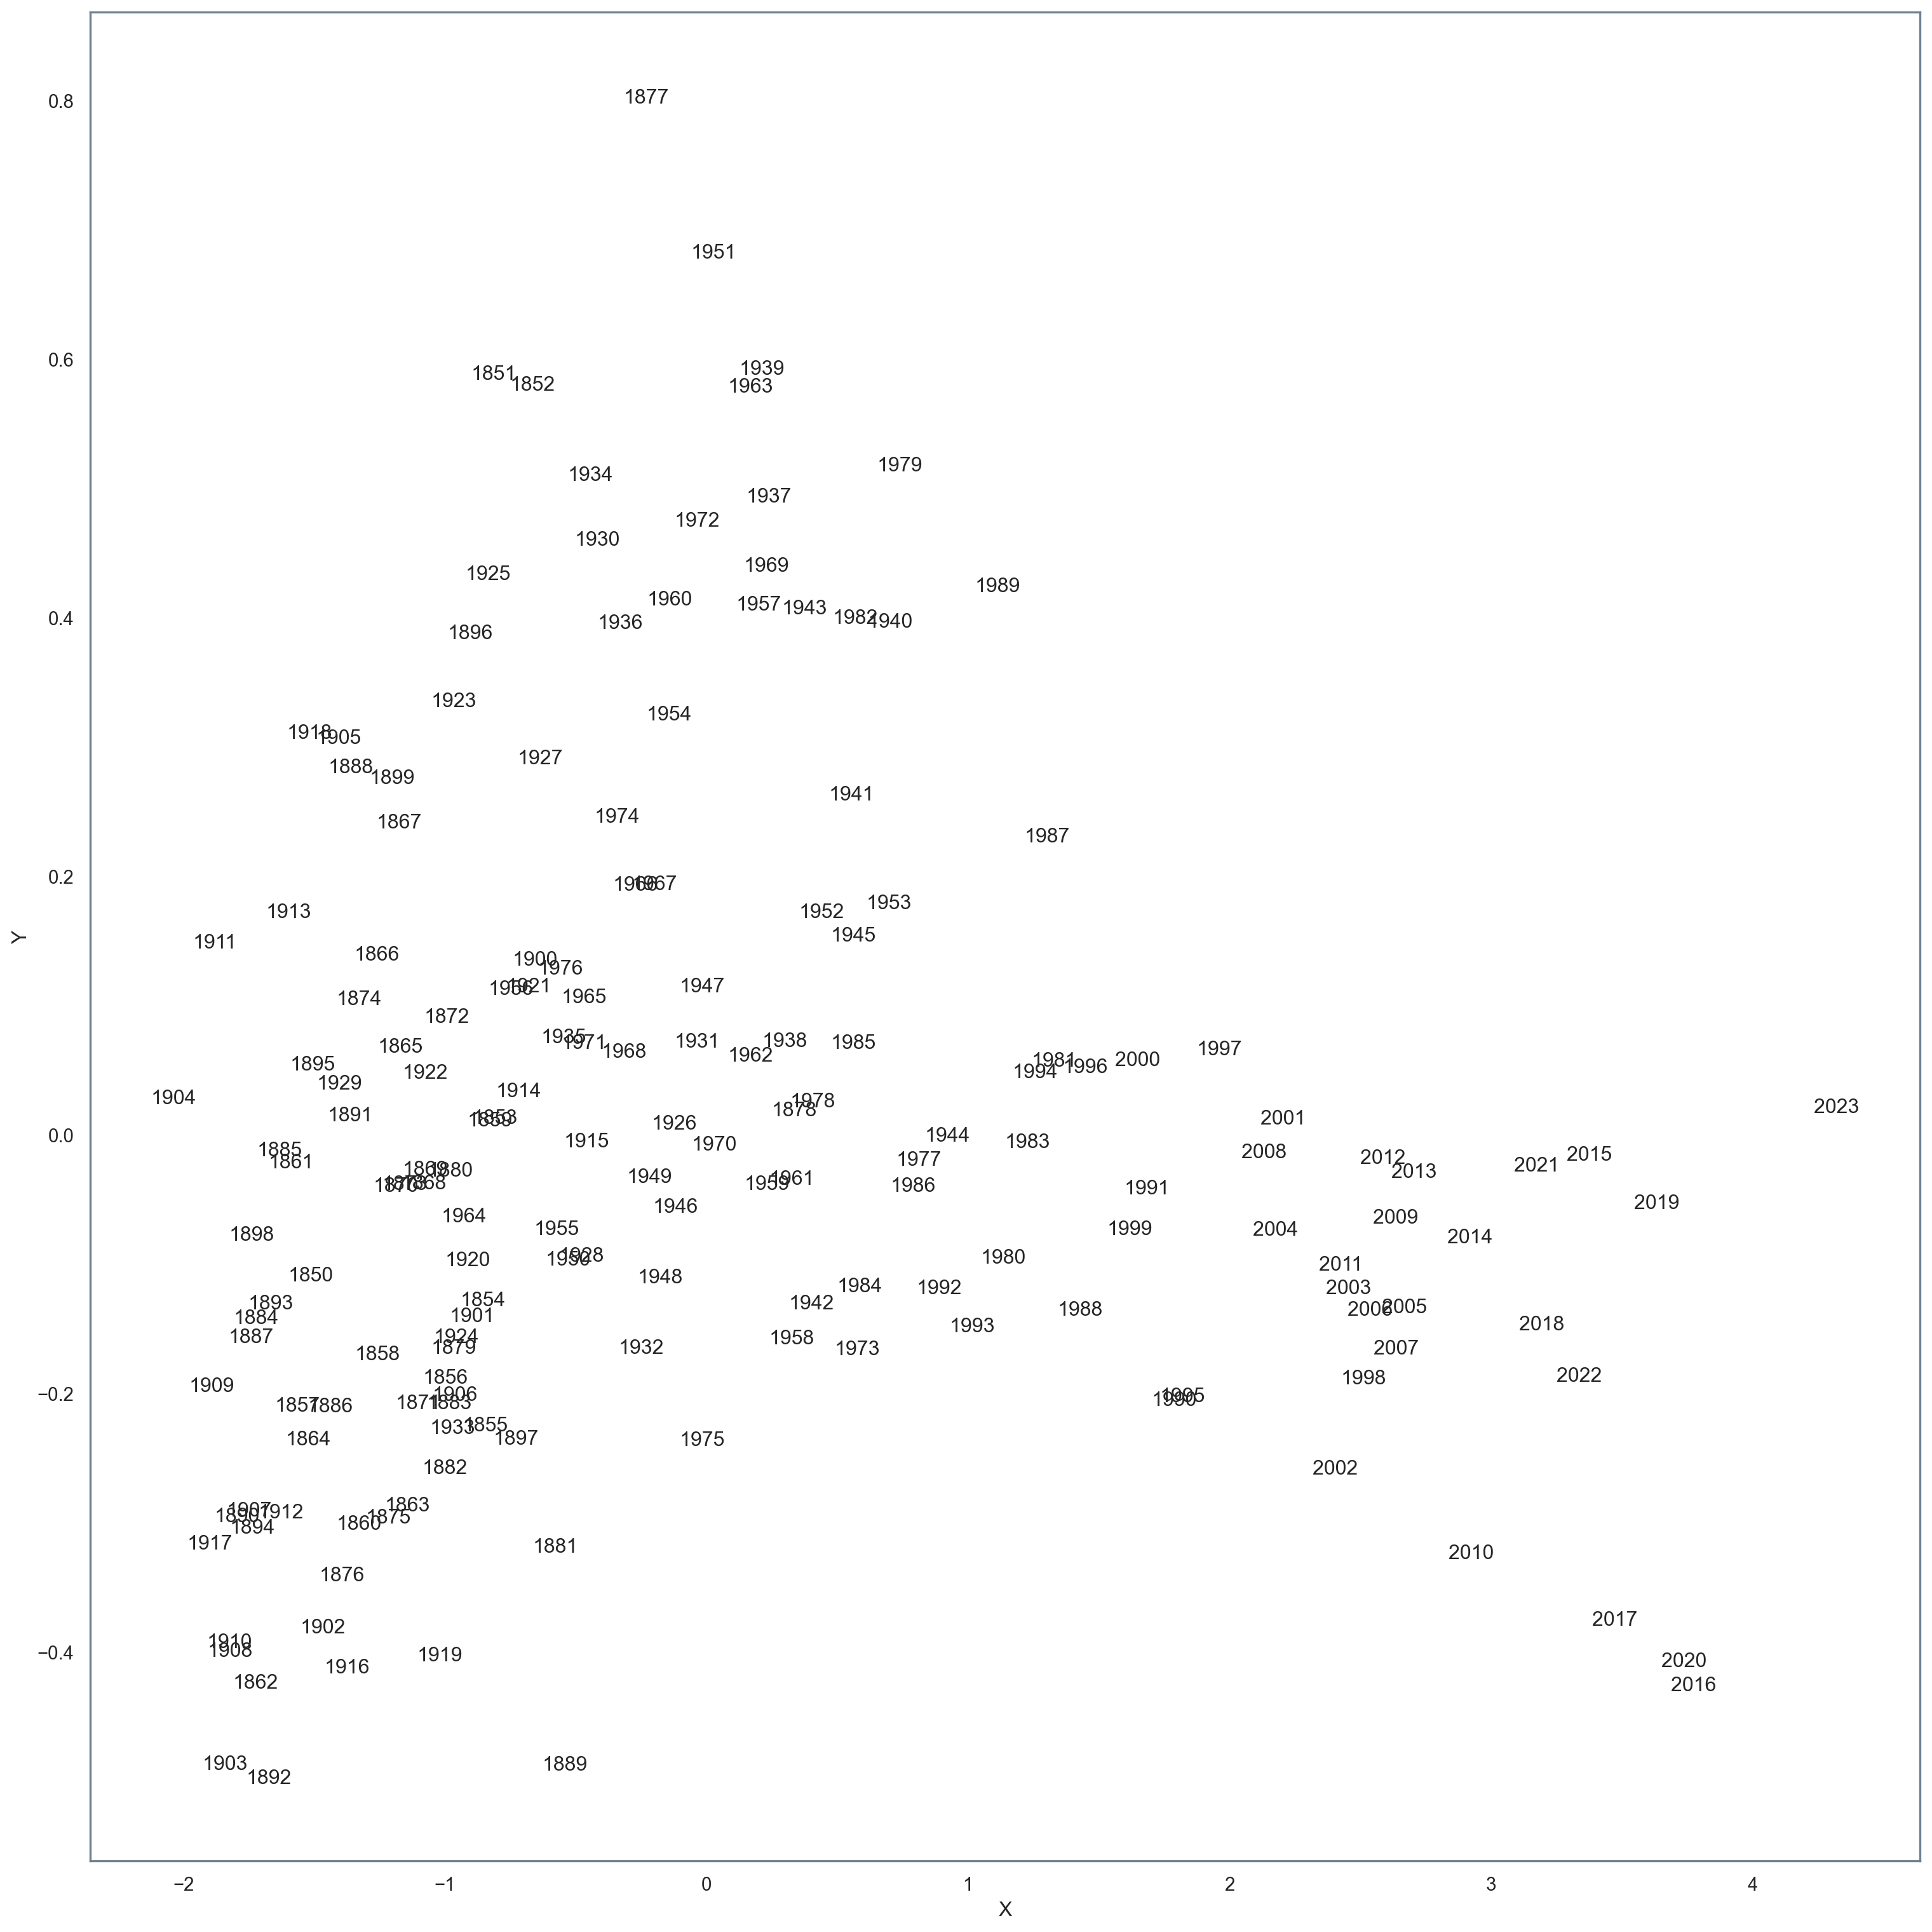

In [21]:
isomap = manifold.Isomap(n_components = 2, n_neighbors = 25)
res = isomap.fit_transform(temp_bis)

so.Plot(pandas.DataFrame(res, columns = ["X", "Y"]).assign(Annee = temp.index), 
        x = "X", y = "Y", text = "Annee") \
    .add(so.Text()) \
    .theme({"axes.facecolor": "w", "axes.edgecolor": "slategray"}) \
    .layout(size=(16, 16))

### LLE

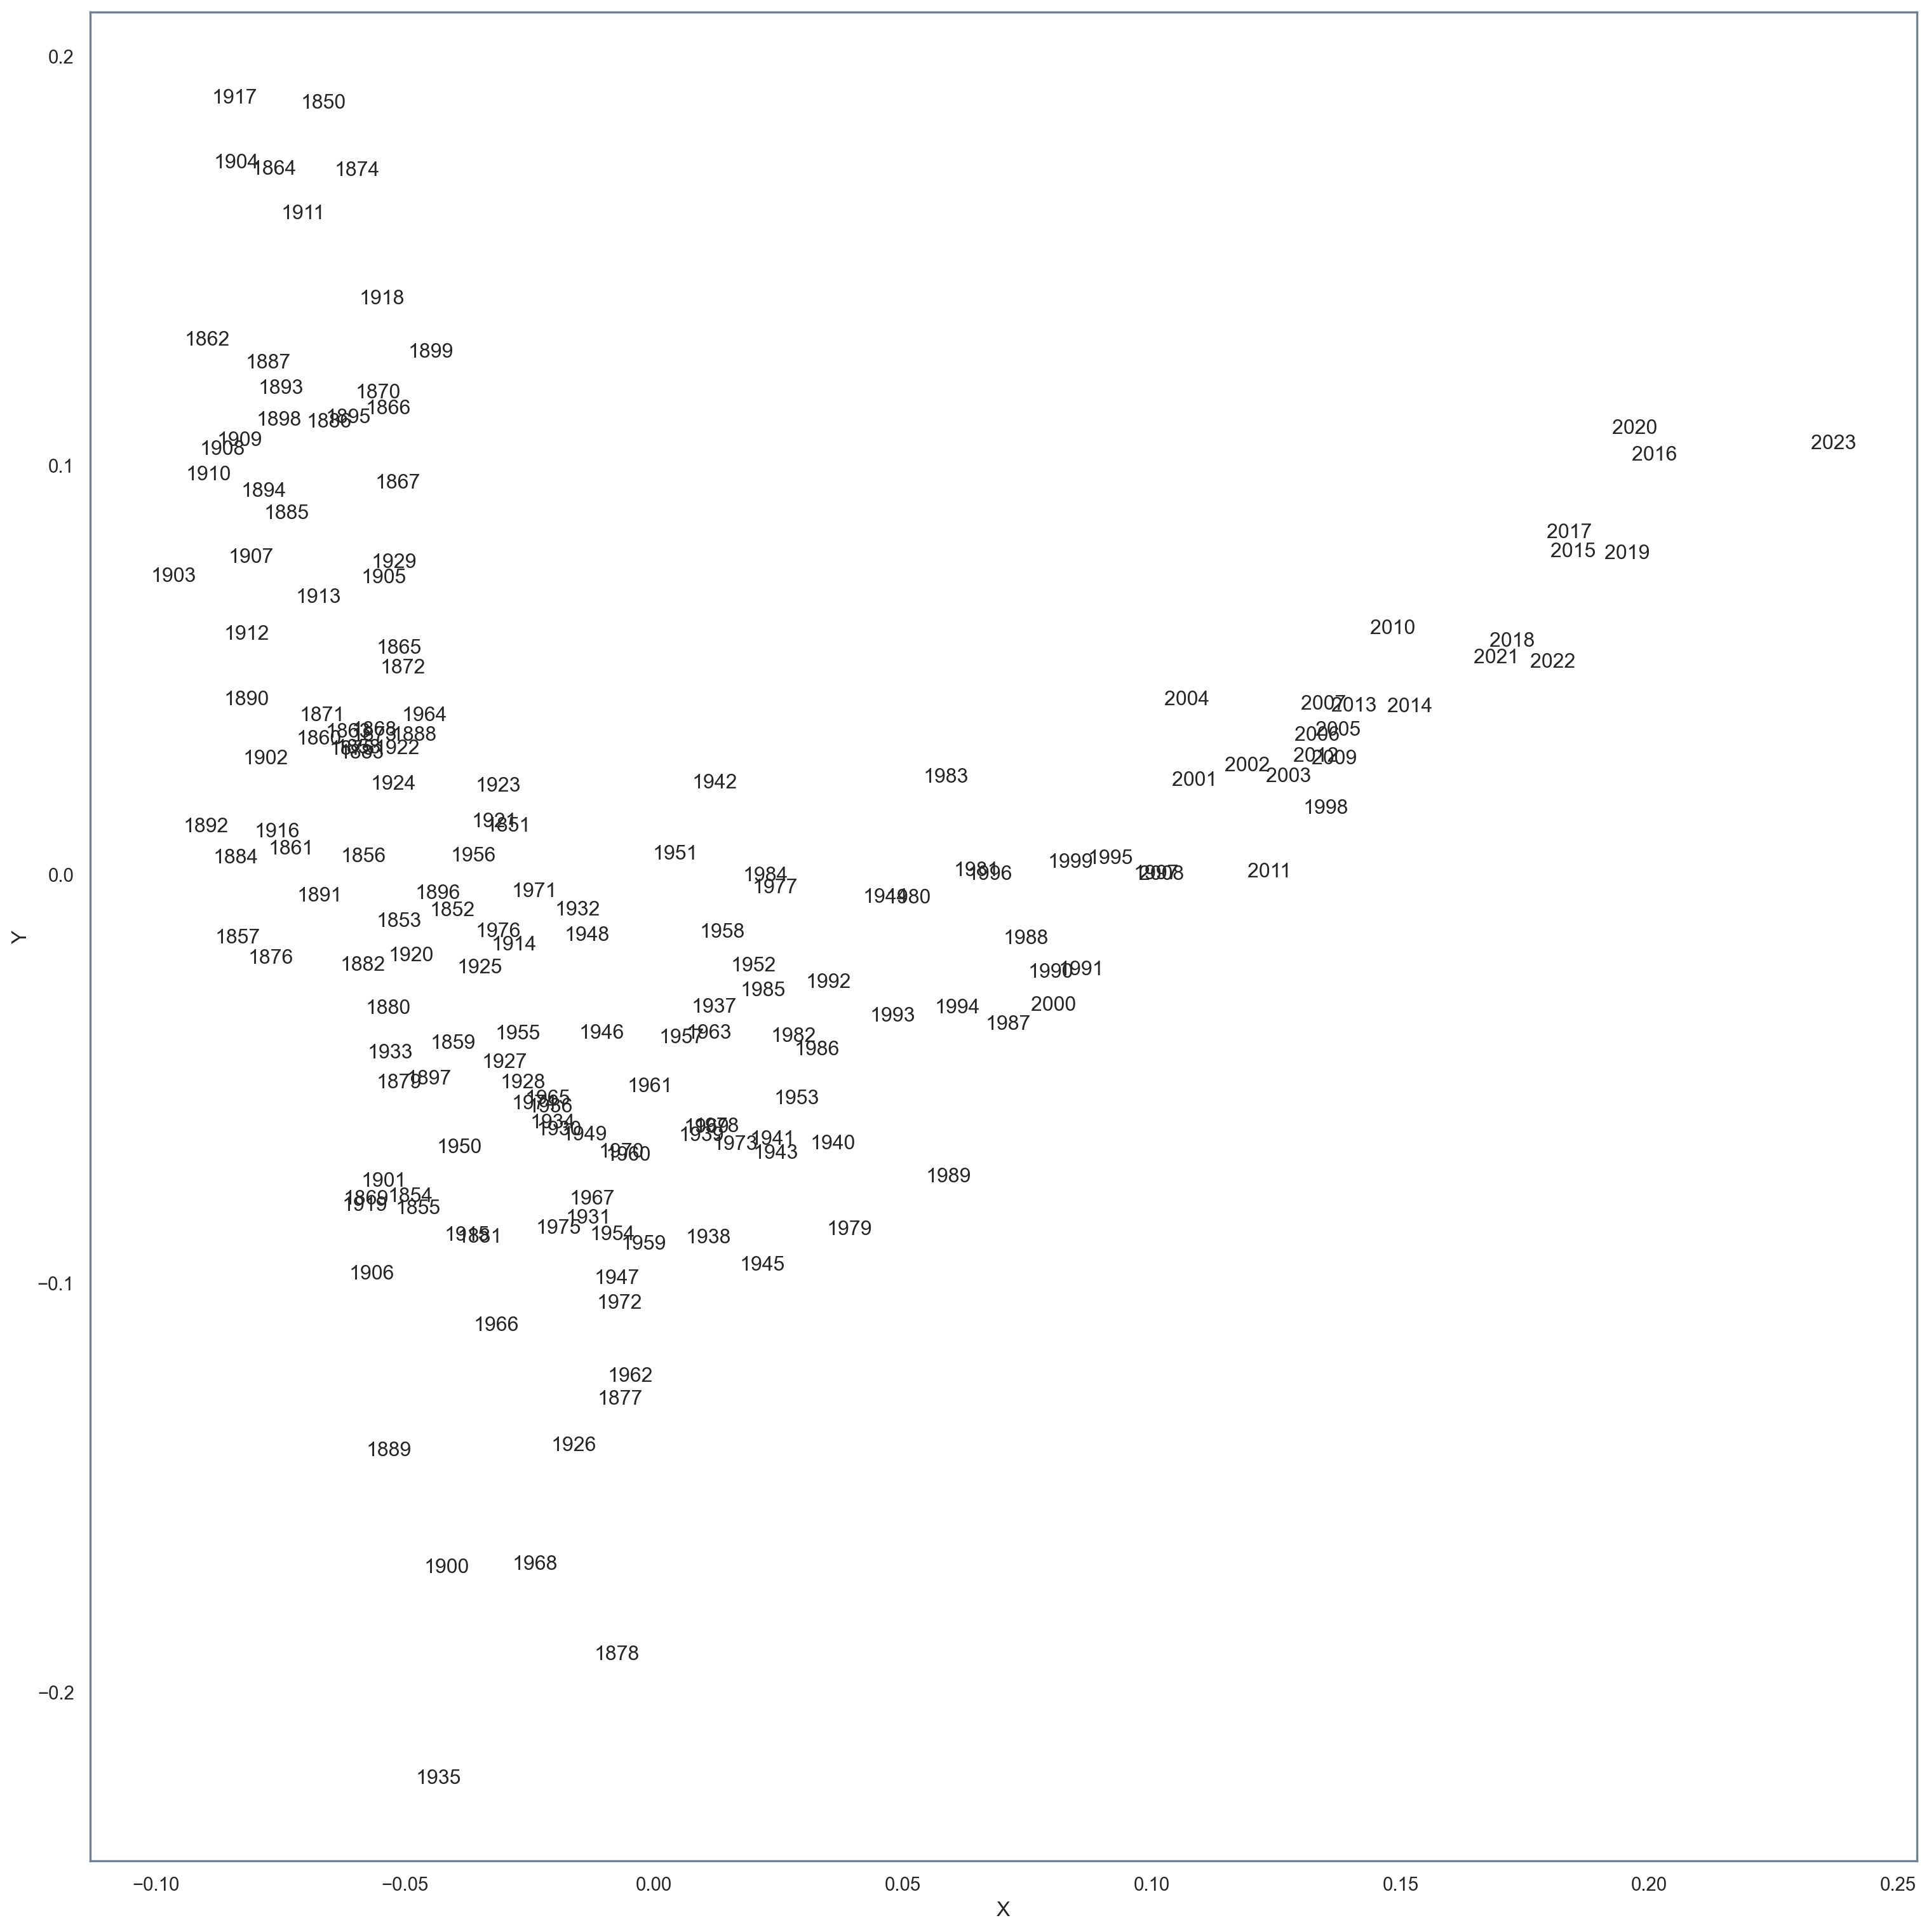

In [22]:
lle = manifold.LocallyLinearEmbedding(n_components = 2, n_neighbors = 20)
res = lle.fit_transform(temp_bis)

so.Plot(pandas.DataFrame(res, columns = ["X", "Y"]).assign(Annee = temp.index), 
        x = "X", y = "Y", text = "Annee") \
    .add(so.Text()) \
    .theme({"axes.facecolor": "w", "axes.edgecolor": "slategray"}) \
    .layout(size=(16, 16))

### MDS

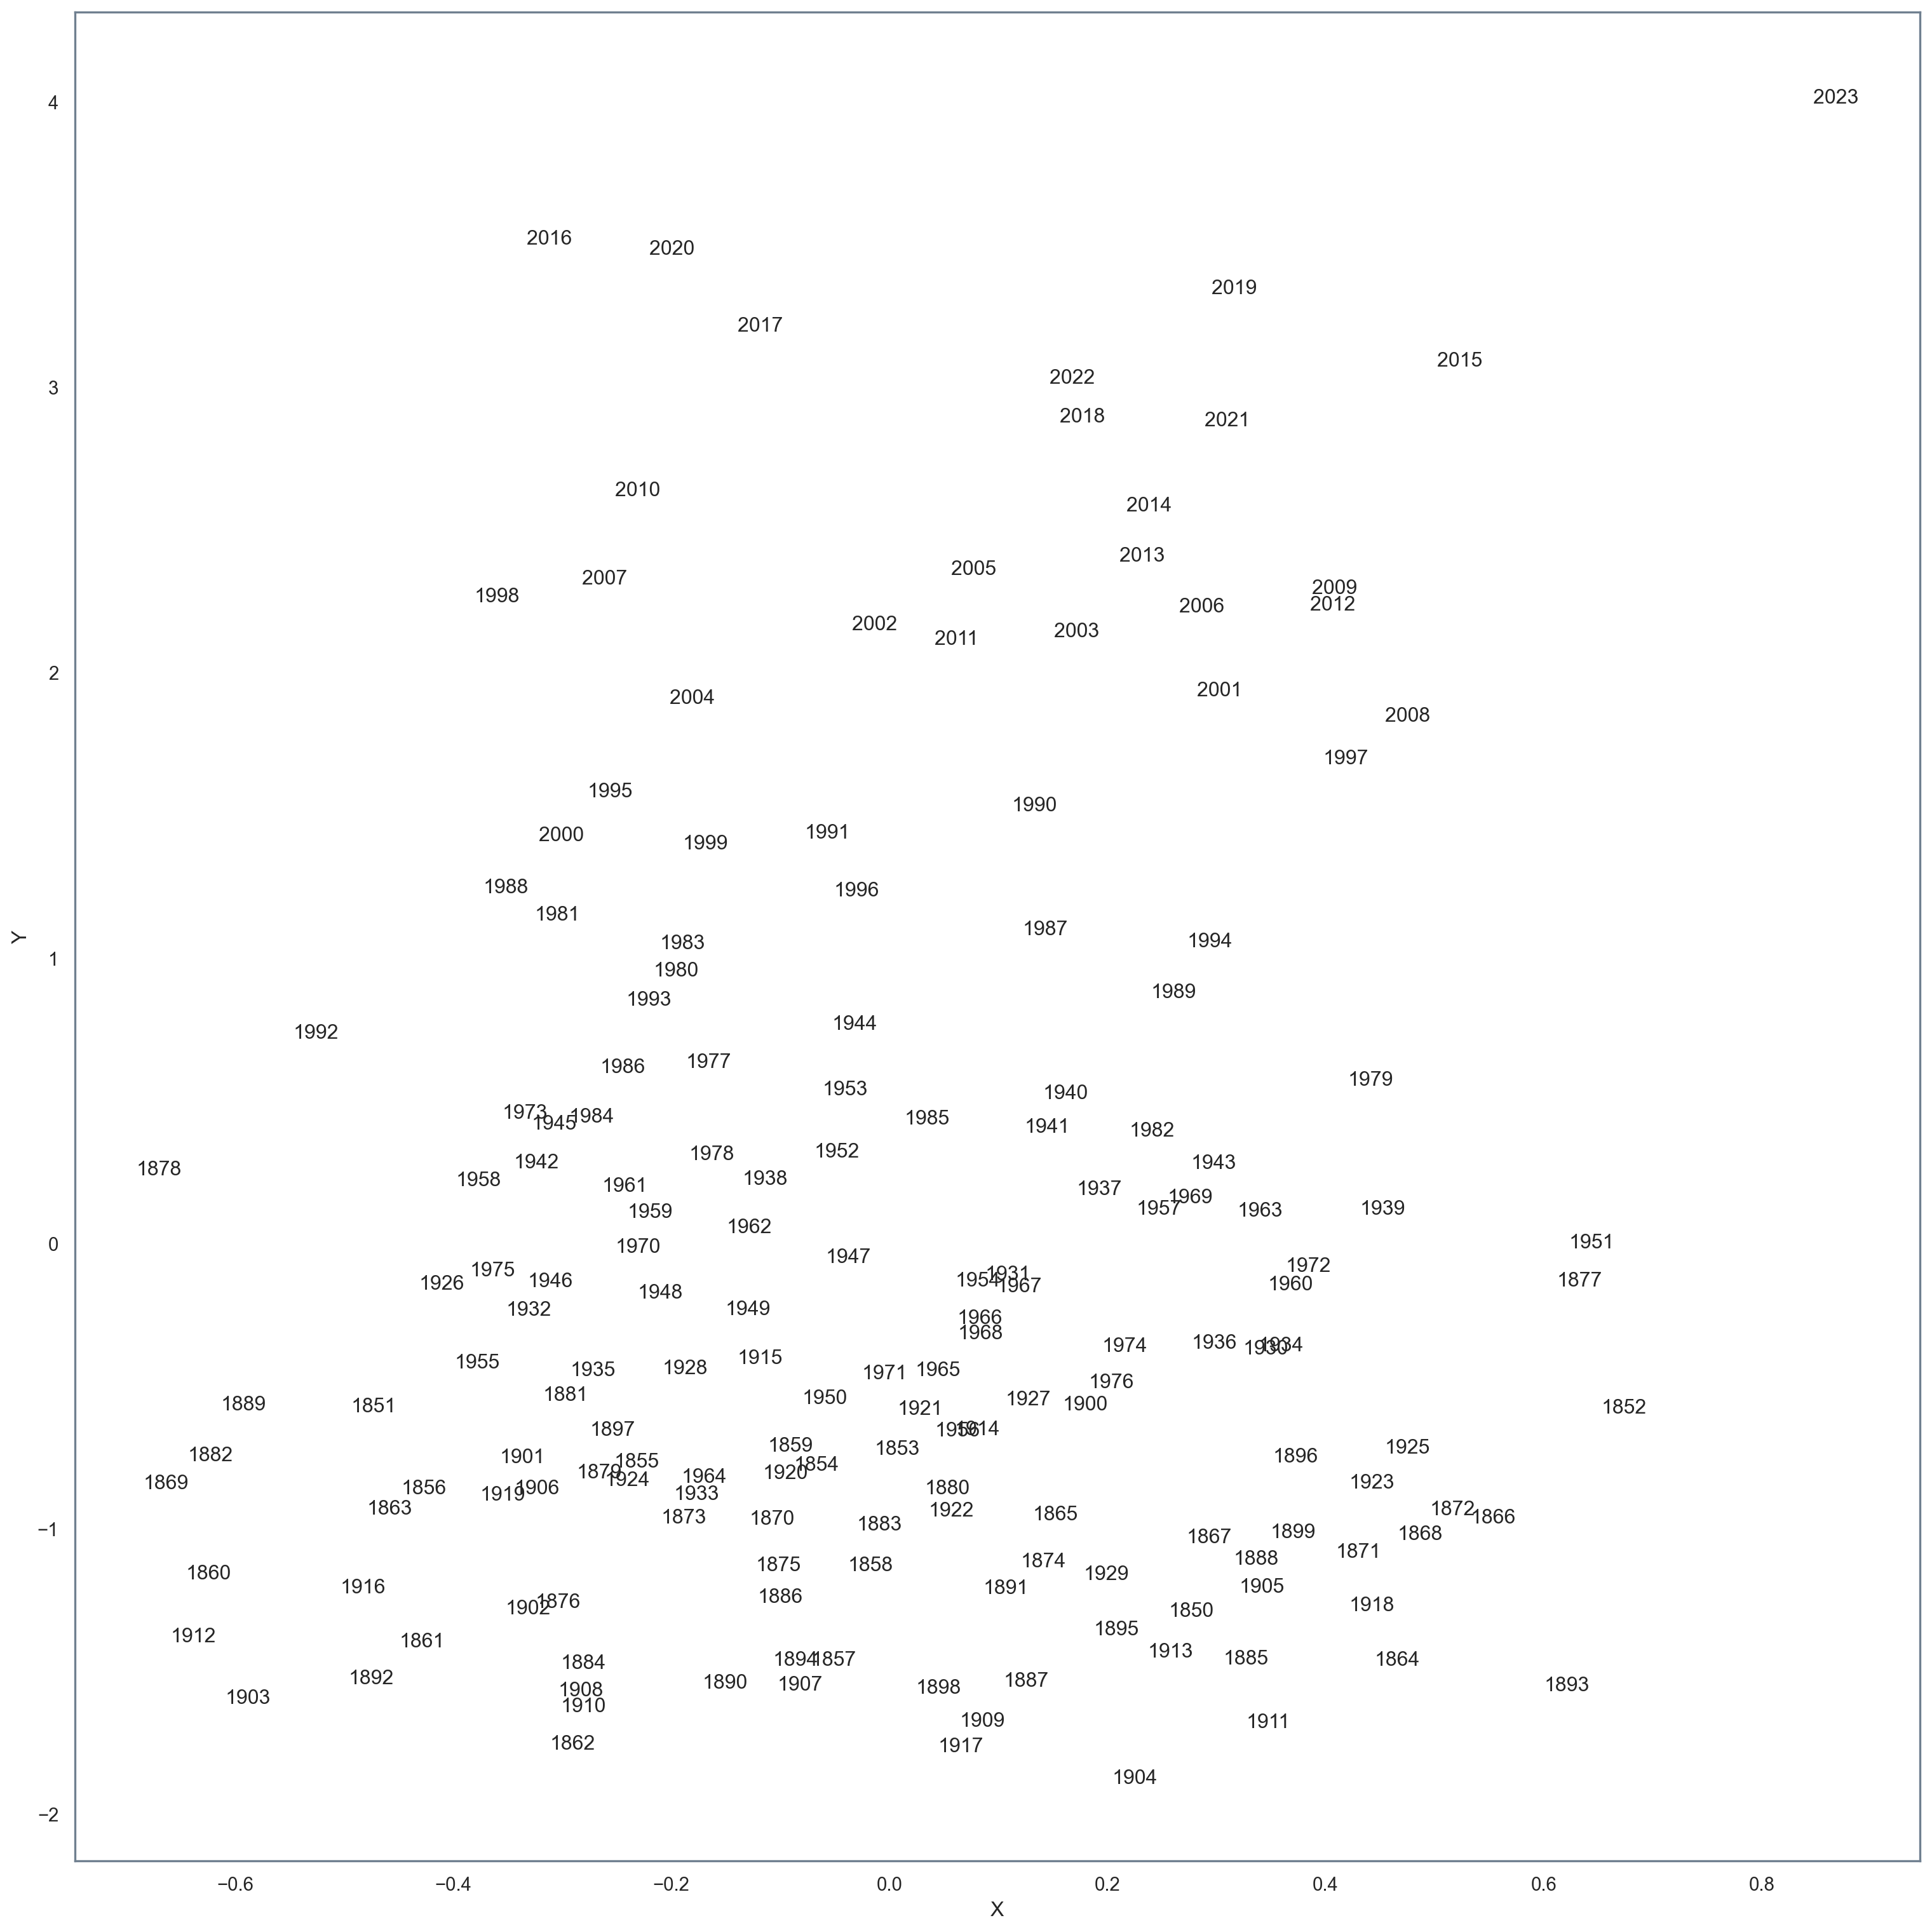

In [25]:
mds = manifold.MDS(n_components = 2, normalized_stress = "auto")
res = mds.fit_transform(temp_bis)

so.Plot(pandas.DataFrame(res, columns = ["X", "Y"]).assign(Annee = temp.index), 
        x = "X", y = "Y", text = "Annee") \
    .add(so.Text()) \
    .theme({"axes.facecolor": "w", "axes.edgecolor": "slategray"}) \
    .layout(size=(16, 16))